## OR on CIFAR-10 dataset

**Inspired** from RP:Striving for simplicity::
the **all convolution net**
https://arxiv.org/pdf/1412.6806.pdf



In [55]:
from tensorflow.keras.datasets import  cifar10

In [56]:
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image

In [57]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [58]:
X_train.shape

(50000, 32, 32, 3)

In [59]:
X_test.shape

(10000, 32, 32, 3)

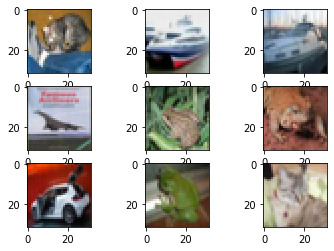

In [61]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img=X_test[i]
    plt.imshow(img)
    
plt.show()    

In [62]:
#preprocessing
seed=6
np.random.seed(seed)

In [63]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

X_train=X_train.astype('float32')

In [64]:
X_test =X_test.astype('float32')

In [65]:
X_train=X_train/255.0
X_test=X_test/255.0

In [66]:
y_train.shape

(50000, 1)

In [67]:
#hot encode using utils
# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Building ALL CNN

C
* Input 32 × 32 RGB image
* 3 × 3 conv. 96 ReLU
* 3 × 3 conv. 96 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 3 × 3 conv. 192 ReLU
* 3 × 3 max-pooling stride 2
* 3 × 3 conv. 192 ReLU
* 1 × 1 conv. 192 ReLU
* 1 × 1 conv. 10 ReLU
* global averaging over 6 × 6 spatial dimensions
* 10 or 100-way softmax

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD

In [69]:
def allcnn(weights =None):
    
    model=Sequential()
    model.add(Conv2D(96,(3,3),padding='same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96,(3,3),padding='same',strides=(2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))
        
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model


In [70]:
#hyper paraamaters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# define additional training parameters
epochs = 350
batch_size = 32

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 192)      

KeyboardInterrupt: 

In [72]:
#hyper paraamaters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
weights='all_cnn_weights_0.9088_0.4994.hdf5'
model = allcnn(weights)

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())


# test the model
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_28 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 192)      

In [73]:
#making a dictionar of calss labels and names
classes=range(0,10)
names=['airplane',
      'automobile',
      'bird',
      'cat',
      'deer',
      'dog',
      'frog',
      'horse',
      'ship',
      'truck'
      ]
class_labels=dict(zip(classes,names))
class_labels

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [74]:
batch=X_test[100:109]
labels=np.argmax(Y_test[100:109],axis=-1)

predictions=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 263ms/step


In [75]:
print(predictions)

[[4.5647234e-18 1.0580984e-20 1.8923278e-10 2.1411404e-11 9.9999928e-01
  2.8037445e-07 3.1478666e-13 4.2381450e-07 1.3699557e-19 1.2097066e-18]
 [2.1190902e-16 2.0386626e-17 1.5672676e-09 5.3581510e-07 1.6256110e-10
  9.9999940e-01 1.6712491e-09 2.0782188e-08 3.6548053e-15 3.5128330e-16]
 [1.2720517e-30 5.0274027e-28 5.1540022e-24 3.6051544e-21 1.0875264e-27
  8.1522779e-22 1.0000000e+00 1.1050992e-27 6.1924619e-32 1.2274381e-23]
 [1.5143771e-16 4.7668690e-18 2.2583695e-09 1.0000000e+00 4.3481128e-11
  1.6884179e-12 4.5317125e-13 2.6686954e-16 7.2659426e-19 6.2049710e-17]
 [8.2502348e-36 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 9.3568045e-36 8.6868626e-30 8.2192576e-22]
 [5.9699731e-24 1.0000000e+00 7.5485268e-27 8.0228679e-27 1.9714101e-30
  2.7338925e-29 7.2188490e-31 5.5680368e-27 1.6186991e-26 1.1906196e-13]
 [6.4563792e-18 2.9642424e-20 1.0046514e-11 9.9999988e-01 6.0156128e-13
  9.1111502e-08 7.8874797e-12 1.1608745e-15 7.8588063e-21 

In [76]:
for image  in predictions:
    print(np.sum(image))

1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [77]:
class_result =np.argmax(predictions,axis=-1)


In [1]:
class_result

NameError: name 'class_result' is not defined

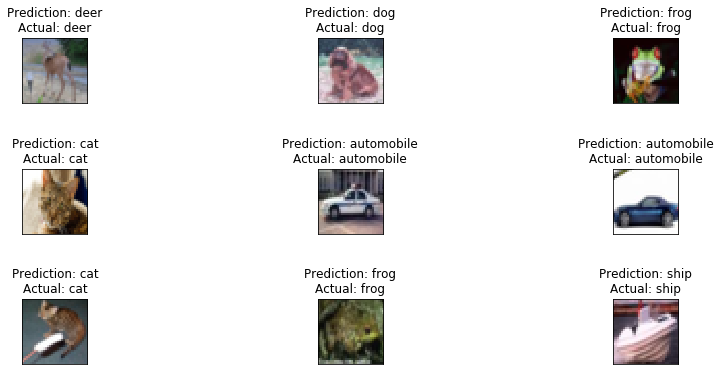

In [84]:
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()